In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import joblib # Import joblib
import os # Import os

read data

In [ ]:
match_df = pd.read_csv('merged_match_data - 複製.csv')

<ipython-input-3-bba9d5681fc3>:1: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


In [ ]:
match_df

,match_id,blue_win,blueChampionKill,blueFirstBlood,blueTowerKill,blueInhibitorKill,blueBaronKill,blueRiftHeraldKill,blueTotalGold,blueMinionsKilled,...,blueDragonChemtech_DragonKill,redDragonAir_DragonKill,blueDragonWater_DragonKill,redDragonFire_DragonKill,blueDragonEarth_DragonKill,blueDragonAir_DragonKill,redDragonElder_DragonKill,blueDragonElder_DragonKill,blueTeamChampions,redTeamChampions
0,KR_7648565285,TRUE,30,False,9,1,1,1,69826,767,...,0,0,0,0,0,0,0,0,0,0
1,KR_7648524385,TRUE,25,False,8,2,0,1,61098,750,...,2,0,0,0,0,0,0,0,0,0
2,KR_7648497975,FALSE,7,True,0,0,0,0,23135,329,...,0,0,0,0,0,0,0,0,0,0
3,KR_7648457052,TRUE,35,False,11,2,1,1,68190,800,...,1,1,0,0,0,0,0,0,0,0
4,KR_7648408599,TRUE,38,False,8,1,0,1,60515,617,...,2,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349,KR_7515303460,False,13,False,2,0,0,1,40150,508,...,0,0,0,1,0,0,0,0,0,0
10350,KR_7514917880,True,48,False,10,2,1,0,75329,783,...,0,1,0,1,0,0,0,0,0,0
10351,KR_7514615896,False,25,False,2,0,0,1,44512,516,...,0,1,0,0,0,0,0,0,0,0
10352,KR_7514570616,False,10,True,1,0,0,0,33229,483,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# 處理目標變數  - modify the original data from column "blue_win" to label-like number 0 and 1 , which individually represents true or false or "won" and "lost"
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

# 選擇資源特徵（排除角色與文字）
feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]

# 過濾出數值欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:
match_df

,match_id,blue_win,blueChampionKill,blueFirstBlood,blueTowerKill,blueInhibitorKill,blueBaronKill,blueRiftHeraldKill,blueTotalGold,blueMinionsKilled,...,blueDragonChemtech_DragonKill,redDragonAir_DragonKill,blueDragonWater_DragonKill,redDragonFire_DragonKill,blueDragonEarth_DragonKill,blueDragonAir_DragonKill,redDragonElder_DragonKill,blueDragonElder_DragonKill,blueTeamChampions,redTeamChampions
0,KR_7648565285,1,30,False,9,1,1,1,69826,767,...,0,0,0,0,0,0,0,0,0,0
1,KR_7648524385,1,25,False,8,2,0,1,61098,750,...,2,0,0,0,0,0,0,0,0,0
2,KR_7648497975,0,7,True,0,0,0,0,23135,329,...,0,0,0,0,0,0,0,0,0,0
3,KR_7648457052,1,35,False,11,2,1,1,68190,800,...,1,1,0,0,0,0,0,0,0,0
4,KR_7648408599,1,38,False,8,1,0,1,60515,617,...,2,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349,KR_7515303460,0,13,False,2,0,0,1,40150,508,...,0,0,0,1,0,0,0,0,0,0
10350,KR_7514917880,1,48,False,10,2,1,0,75329,783,...,0,1,0,1,0,0,0,0,0,0
10351,KR_7514615896,0,25,False,2,0,0,1,44512,516,...,0,1,0,0,0,0,0,0,0,0
10352,KR_7514570616,0,10,True,1,0,0,0,33229,483,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- 讀取與處理資料 ---
match_df = pd.read_csv('merged_match_data - 複製.csv')
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()
X = match_df[numeric_cols].fillna(0)
y = match_df['blue_win']

# --- 標準化 ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 資料切分（統一使用相同切分）---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 模型定義 ---
models = {
    "GaussianNB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# --- 統整結果 ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train Accuracy": round(accuracy_score(y_train, y_train_pred), 3),
        "Test Accuracy": round(accuracy_score(y_test, y_test_pred), 3),
        "Cross-Val Accuracy": round(cross_val_score(model, X_scaled, y, cv=5).mean(), 3)
    })

# --- 顯示結果表格 ---
results_df = pd.DataFrame(results)
print("\n result：")
print(results_df)


<ipython-input-18-5c4a987474f3>:11: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')



 result：
                 Model  Train Accuracy  Test Accuracy  Cross-Val Accuracy
0           GaussianNB           0.946          0.960               0.950
1  Logistic Regression           0.992          0.994               0.992
2            KNN (k=5)           0.968          0.962               0.957
3        Random Forest           1.000          0.986               0.987


# Random Forest algorithm for The Project

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- 讀取與處理資料 ---
match_df = pd.read_csv('merged_match_data - 複製.csv')
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Features used for training:", numeric_cols) # ADD THIS LINE

# 建立資料集
X = match_df[numeric_cols].fillna(0)
y = match_df['blue_win']

Features used for training: ['blueChampionKill', 'blueTowerKill', 'blueInhibitorKill', 'blueBaronKill', 'blueRiftHeraldKill', 'blueTotalGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgPlayerLevel', 'redChampionKill', 'redTowerKill', 'redInhibitorKill', 'redBaronKill', 'redRiftHeraldKill', 'redTotalGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgPlayerLevel', 'blueDragonKill', 'blueDragonHextechKill', 'blueDragonChemtechKill', 'blueDragonFireKill', 'blueDragonAirKill', 'blueDragonEarthKill', 'blueDragonWaterKill', 'blueDragonElderKill', 'blueVoidgrubKill', 'blueAtakhanKill', 'redDragonKill', 'redDragonHextechKill', 'redDragonChemtechKill', 'redDragonFireKill', 'redDragonAirKill', 'redDragonEarthKill', 'redDragonWaterKill', 'redDragonElderKill', 'redVoidgrubKill', 'redAtakhanKill', 'redDragonChemtech_DragonKill', 'redDragonEarth_DragonKill', 'blueDragonHextech_DragonKill', 'redDragonHextech_DragonKill', 'redDragonWater_DragonKill', 'blueDragonFire_DragonKill', 

<ipython-input-32-9fef0c21e2d7>:11: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


-> 單純的訓練  測試切分（80% 訓練 / 20% 測試），用於最終 模型評估。

-> 用來做模型微調（如調參數、early stopping 等用途），不是最終測試。

In [ ]:
# --- 資料切分: 70% train / 15% val / 15% test ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- create model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Validation Set for tuning ---
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]


print("📘 Result of Validation Set for tuning")
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_prob))
print("Proportion of Positive Class Predictions (label=1):", sum(y_val_pred) / len(y_val_pred))

# --- test set ---
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]
print("\n📙 Result of Testing Set")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))

### ===== Random Forest ===== (test Functionality and Generalizability)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("\n📕 Random Forest")
print("Train Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(rf_model, X, y, cv=5).mean())
print(classification_report(y_test, rf_model.predict(X_test)))


📘 Result of Validation Set for tuning
Val Accuracy: 0.9876462938881665
F1 Score: 0.9878127004490058
ROC AUC: 0.9992262025573371
Proportion of Positive Class Predictions (label=1): 0.5065019505851756

📙 Result of Testing Set
Test Accuracy: 0.9889538661468485
F1 Score: 0.9890815671162492
ROC AUC: 0.9994637186676576

📕 Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.9889538661468485
Cross-Validation Accuracy: 0.9873221153274429
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       760
           1       0.99      0.99      0.99       779

    accuracy                           0.99      1539
   macro avg       0.99      0.99      0.99      1539
weighted avg       0.99      0.99      0.99      1539



visualize the testing result

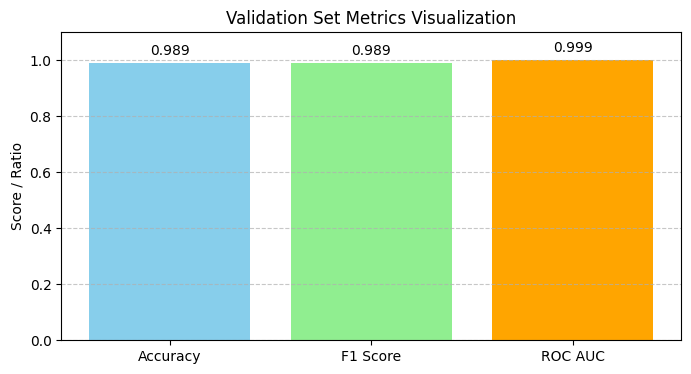

In [ ]:
import matplotlib.pyplot as plt

# 指標數值
metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "F1 Score":  f1_score(y_test, y_test_pred),
    "ROC AUC": roc_auc_score(y_test, y_test_prob),
}

plt.figure(figsize=(8, 4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.ylim(0, 1.1)  # 指標都是0~1之間
plt.title("Validation Set Metrics Visualization")
plt.ylabel("Score / Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.03, f"{v:.3f}", ha='center')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB # Not used in RF example, but kept for completeness
from sklearn.linear_model import LogisticRegression # Not used in RF example, but kept for completeness
from sklearn.neighbors import KNeighborsClassifier # Not used in RF example, but kept for completeness
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler # Not used in RF example, but kept for completeness
import pandas as pd

# --- 讀取與處理資料 ---
match_df = pd.read_csv('merged_match_data - 複製.csv')

# 將 'blue_win' 欄位轉換為 0 或 1
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

# --- 選擇特徵欄位 ---

excluded_leak_features = [
    'blueInhibitorKill', 'redInhibitorKill',
    'blueTowerKill', 'redTowerKill',
    'blueBaronKill', 'redBaronKill',
    # 'blueElderKill', 'redElderKill', # 如果存在 'ElderKill' 相關的，也應該排除
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ THIS WAS A COMMENT BEFORE, NOW WE NEED TO EXCLUDE THEM DEFINITIVELY
    'blueTotalGold', 'redTotalGold', # 如果這是最終金錢，也應該排除
    'blueChampionKill', 'redChampionKill', # 如果這是最終擊殺數，也應該排除
    # 針對龍的擊殺，如果它們是最終累計的，也應該排除
    'blueDragonKill', 'redDragonKill', # 總龍擊殺
    'blueDragonHextechKill', 'redDragonHextechKill',
    'blueDragonChemtechKill', 'redDragonChemtechKill',
    'blueDragonFireKill', 'redDragonFireKill',
    'blueDragonAirKill', 'redDragonAirKill',
    'blueDragonEarthKill', 'redDragonEarthKill',
    'blueDragonWaterKill', 'redDragonWaterKill',
    'blueDragonElderKill', 'redDragonElderKill', # <--- ADD THESE EXPLICITLY HERE
    'blueVoidgrubKill', 'redVoidgrubKill', # 虛空幼蟲 (新版野怪，若為最終數可能洩漏)
    'blueAtakhanKill', 'redAtakhanKill', # 阿塔肯 (新版野怪，若為最終數可能洩漏)
    # 額外排除你原始代碼中已排除的欄位
    'championId', 'position', 'TeamChampions'
]

# 構建新的 feature_cols 列表
feature_cols = [
    col for col in match_df.columns
    if col != 'blue_win' # 確保目標變數不作為特徵
    and not any(ex_col in col for ex_col in excluded_leak_features) # 排除包含洩漏關鍵字的欄位
    # 由於你的龍擊殺欄位名稱比較複雜，我們可以用更精確的方式來排除，或者直接在 excluded_leak_features 中列出完整名稱
    # 這裡我們用 'not in' 確保精確排除
    # Make sure 'blueDragonElderKill' and 'redDragonElderKill' are handled by the 'any' check above
    # or explicitly listed here if their names are not captured by 'ElderKill' keyword
    and col not in ['blueDragonHextech_DragonKill', 'redDragonHextech_DragonKill',
                    'redDragonChemtech_DragonKill', 'blueDragonChemtech_DragonKill',
                    'redDragonEarth_DragonKill', 'blueDragonEarth_DragonKill',
                    'redDragonWater_DragonKill', 'blueDragonWater_DragonKill',
                    'redDragonFire_DragonKill', 'blueDragonFire_DragonKill',
                    'redDragonAir_DragonKill', 'blueDragonAir_DragonKill',
                    # 'redDragonElder_DragonKill', 'blueDragonElder_DragonKill' # If these specific names exist, ensure they are in excluded_leak_features
                   ]
]





# 再次確認只選擇數值型欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Features used for training (after excluding potential leakage):", numeric_cols)

# 建立資料集 (使用清理後的特徵)
X = match_df[numeric_cols].fillna(0) # 填補缺失值，保持與原代碼一致
y = match_df['blue_win']

# --- 資料切分: 70% train / 15% val / 15% test ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- 創建並訓練 Random Forest 模型 ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 驗證集結果 (用於模型調優參考) ---
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]

print("\n📘 Result of Validation Set for tuning (After Leakage Removal)")
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_prob))
print("Proportion of Positive Class Predictions (label=1):", sum(y_val_pred) / len(y_val_pred))

# --- 測試集結果 ---
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]
print("\n📙 Result of Testing Set (After Leakage Removal)")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))

### ===== Random Forest (test Functionality and Generalizability) =====
# 重新初始化一個模型，確保獨立評估
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # 再次在訓練集上訓練

print("\n📕 Random Forest Performance (After Leakage Removal)")
print("Train Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(rf_model, X, y, cv=5).mean())
print(classification_report(y_test, rf_model.predict(X_test)))

<ipython-input-38-19152a102e0b>:11: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


Features used for training (after excluding potential leakage): ['blueRiftHeraldKill', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgPlayerLevel', 'redRiftHeraldKill', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgPlayerLevel', 'redDragonElder_DragonKill', 'blueDragonElder_DragonKill']

📘 Result of Validation Set for tuning (After Leakage Removal)
Val Accuracy: 0.9655396618985695
F1 Score: 0.9658284977433914
ROC AUC: 0.9949064677626682
Proportion of Positive Class Predictions (label=1): 0.5013003901170351

📙 Result of Testing Set (After Leakage Removal)
Test Accuracy: 0.9720597790773229
F1 Score: 0.9725239616613418
ROC AUC: 0.9956058712249172

📕 Random Forest Performance (After Leakage Removal)
Train Accuracy: 1.0
Test Accuracy: 0.9720597790773229
Cross-Validation Accuracy: 0.9694754492157305
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       760
           1       0.97      0.98      0.97       779

    accuracy   

Graph-
📊 1. 混淆矩陣（Confusion Matrix）
📈 2. ROC Curve（接收者操作特徵曲線）
🌲 3. 特徵重要性（Feature Importance）

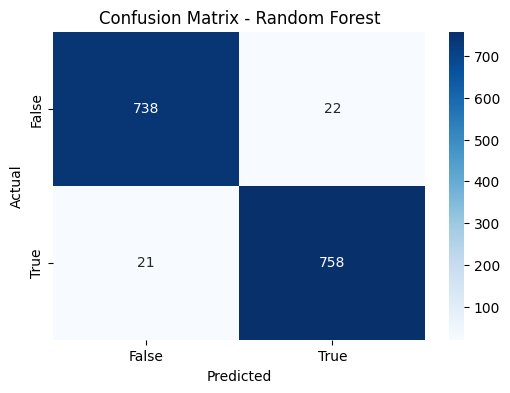

Accuracy:  0.9721
Precision: 0.9718
Recall (TPR): 0.9730
False Positive Rate (FPR): 0.0289
F1-score:  0.9724


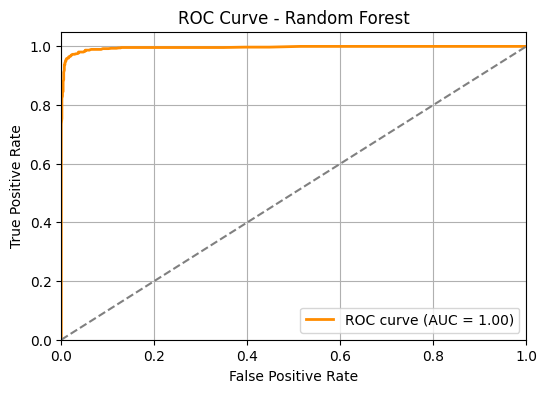

<ipython-input-34-2f2b5764c3ca>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:top_n]], y=[numeric_cols[i] for i in indices[:top_n]], palette='YlGnBu')


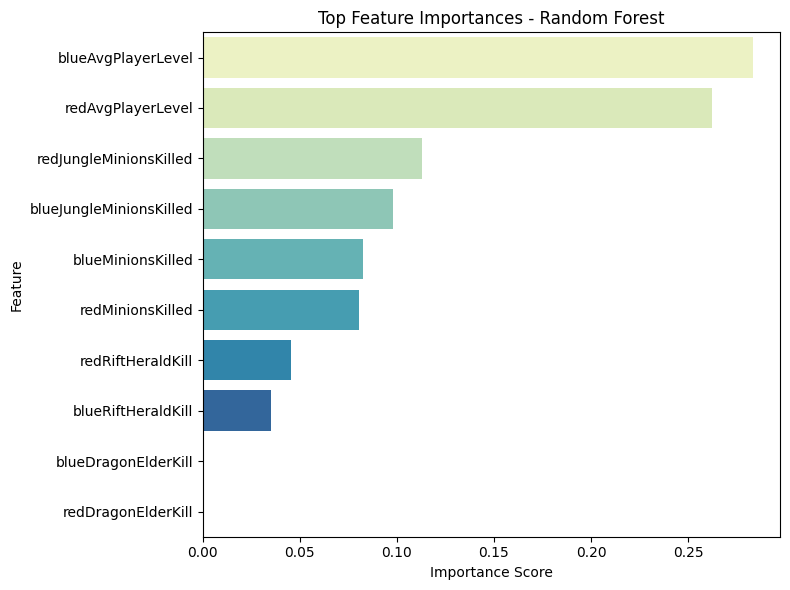

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# 預測值
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # 機率用於 ROC

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# 混淆矩陣值
tn, fp, fn, tp = cm.ravel()

# 指標計算
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)  # TPR
fpr = fp / (fp + tn)
f1 = 2 * (precision * recall) / (precision + recall)

# 顯示
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1-score:  {f1:.4f}")



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Features visualization
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
top_n = 15  # 顯示前 N 名特徵

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices[:top_n]], y=[numeric_cols[i] for i in indices[:top_n]], palette='YlGnBu')
plt.title('Top Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# appendix

more detailed comparison

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


match_df = pd.read_csv('merged_match_data - 複製.csv')

# 處理目標變數  - modify the original data from column "blue_win" to label-like number 0 and 1 , which individually represents true or false or "won" and "lost"
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

# 選擇資源特徵（排除角色與文字）
feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]

# 過濾出數值欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

X = match_df[numeric_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 對全部資料標準化
y = match_df['blue_win']


# Naive Bayes (GaussianNB for continous data)
nb_model = GaussianNB()
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model.fit(X_train, y_train)

print("📘 Gaussian Naive Bayes")
print("Train Accuracy:", accuracy_score(y_train, nb_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(nb_model, X, y, cv=5).mean())
print(classification_report(y_test, nb_model.predict(X_test)))

# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
print("📙 Logistic Regression (Standardized)")
print("Train Accuracy:", accuracy_score(y_train, lr_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(lr_model, X_scaled, y, cv=5).mean())
print(classification_report(y_test, lr_model.predict(X_test)))

# KNN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("\n📗 KNN (Standardized)")
print("Train Accuracy:", accuracy_score(y_train, knn_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, knn_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(knn_model, X_scaled, y, cv=5).mean())
print(classification_report(y_test, knn_model.predict(X_test)))

### ===== Random Forest ===== (test Functionality and Generalizability)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("\n📕 Random Forest")
print("Train Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(rf_model, X, y, cv=5).mean())
print(classification_report(y_test, rf_model.predict(X_test)))



<ipython-input-35-3f61acce43c6>:11: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


📘 Gaussian Naive Bayes
Train Accuracy: 0.7156193395569179
Test Accuracy: 0.7381416504223521
Cross-Validation Accuracy: 0.9690855858534206
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       760
           1       0.71      0.82      0.76       779

    accuracy                           0.74      1539
   macro avg       0.74      0.74      0.74      1539
weighted avg       0.74      0.74      0.74      1539

📙 Logistic Regression (Standardized)
Train Accuracy: 0.9920760697305864
Test Accuracy: 0.9936616284739151
Cross-Validation Accuracy: 0.9916130382561749
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       994
           1       0.99      1.00      0.99      1057

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051


📗 KNN (Standardized)
Train Accuracy: 0.9683042789223455

Graph-
📊 1. 混淆矩陣（Confusion Matrix）
📈 2. ROC Curve（接收者操作特徵曲線）
🌲 3. 特徵重要性（Feature Importance）

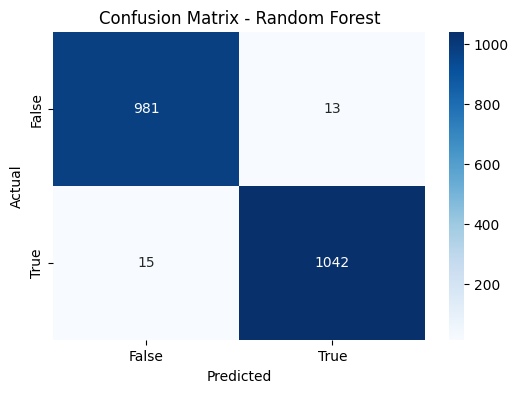

Accuracy:  0.9863
Precision: 0.9877
Recall (TPR): 0.9858
False Positive Rate (FPR): 0.0131
F1-score:  0.9867


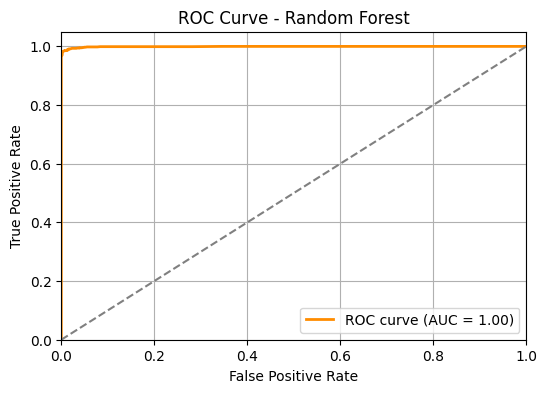

<ipython-input-36-a6d6ef6aa9d7>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:top_n]], y=[numeric_cols[i] for i in indices[:top_n]], palette='YlGnBu')


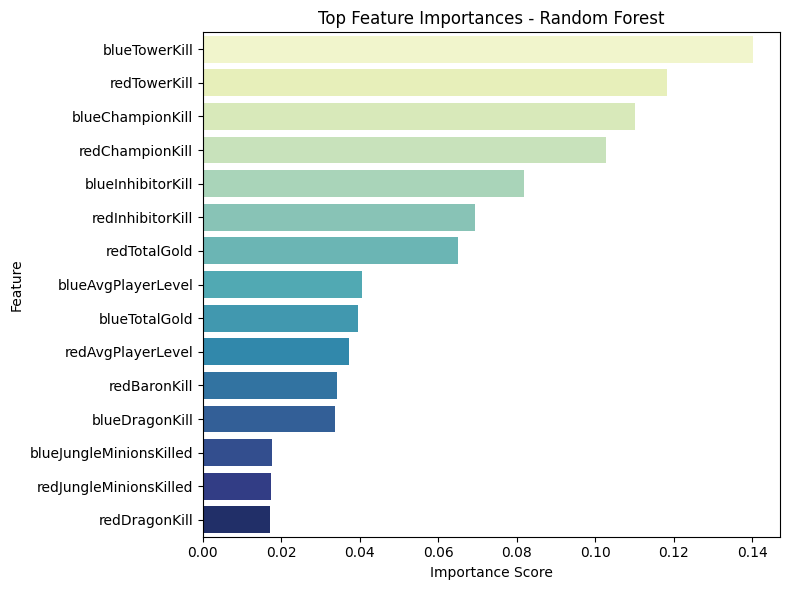

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# 預測值
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # 機率用於 ROC

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# 混淆矩陣值
tn, fp, fn, tp = cm.ravel()

# 指標計算
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)  # TPR
fpr = fp / (fp + tn)
f1 = 2 * (precision * recall) / (precision + recall)

# 顯示
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1-score:  {f1:.4f}")



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print()

# Features visualization
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
top_n = 15  # 顯示前 N 名特徵

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices[:top_n]], y=[numeric_cols[i] for i in indices[:top_n]], palette='YlGnBu')
plt.title('Top Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


其他

In [ ]:
print(X.columns.tolist())

['blueChampionKill', 'blueTowerKill', 'blueInhibitorKill', 'blueBaronKill', 'blueRiftHeraldKill', 'blueTotalGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgPlayerLevel', 'redChampionKill', 'redTowerKill', 'redInhibitorKill', 'redBaronKill', 'redRiftHeraldKill', 'redTotalGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgPlayerLevel', 'blueDragonKill', 'blueDragonHextechKill', 'blueDragonChemtechKill', 'blueDragonFireKill', 'blueDragonAirKill', 'blueDragonEarthKill', 'blueDragonWaterKill', 'blueDragonElderKill', 'blueVoidgrubKill', 'blueAtakhanKill', 'redDragonKill', 'redDragonHextechKill', 'redDragonChemtechKill', 'redDragonFireKill', 'redDragonAirKill', 'redDragonEarthKill', 'redDragonWaterKill', 'redDragonElderKill', 'redVoidgrubKill', 'redAtakhanKill', 'redDragonChemtech_DragonKill', 'redDragonEarth_DragonKill', 'blueDragonHextech_DragonKill', 'redDragonHextech_DragonKill', 'redDragonWater_DragonKill', 'blueDragonFire_DragonKill', 'blueDragonChemtech_DragonKi

In [ ]:
import pandas as pd
import joblib
import os
import sklearn

# Check library versions (optional, but good for debugging)
print(f"Joblib version: {joblib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

# Define the path to the models directory
model_dir = "models"
model_path = os.path.join(model_dir, "rf_model.pkl")
columns_path = os.path.join(model_dir, "rf_columns.txt")


# 載入模型與欄位
# Ensure the model and columns file paths are correct
model = joblib.load(model_path)
with open(columns_path, "r") as f:
    columns = [line.strip() for line in f.readlines()]

# 欄位說明（可根據需要擴充）
descriptions = {
    "blueChampionKill": "藍隊擊殺數",
    "blueFirstBlood": "藍隊是否拿到首殺（0 或 1）",
    "blueTowerKill": "藍隊摧毀塔數",
    "blueTotalGold": "藍隊總金錢",
    "blueAvgPlayerLevel": "藍隊平均等級",
    "redChampionKill": "紅隊擊殺數",
    "redFirstBlood": "紅隊是否拿到首殺（0 或 1）",
    "redTowerKill": "紅隊摧毀塔數",
    "redTotalGold": "紅隊總金錢",
    "redAvgPlayerLevel": "紅隊平均等級"
}

print("🧠 英雄聯盟比賽勝率預測系統")
print("🔽 請依照下列提示逐一輸入比賽資源特徵：")

while True:
    values = []
    print("\n👉 開始輸入一場比賽資訊（輸入空白直接結束）：")
    for col in columns:
        desc = descriptions.get(col, "請輸入數值")
        while True:
            val = input(f"{col}（{desc}）：")
            if val.strip() == "":
                print("⛔️ 輸入中止。")
                exit()
            try:
                values.append(float(val))
                break
            except:
                print("⚠️ 請輸入正確數值！")

    df = pd.DataFrame([values], columns=columns)
    prob = model.predict_proba(df)[0][1]
    print(f"🔍 藍隊勝率預測：{prob:.2%}")
    print("→ 判斷結果：", "藍隊優勢 ✅" if prob >= 0.5 else "紅隊優勢 ❗")

Joblib version: 1.5.0
Scikit-learn version: 1.6.1
🧠 英雄聯盟比賽勝率預測系統
🔽 請依照下列提示逐一輸入比賽資源特徵：

👉 開始輸入一場比賽資訊（輸入空白直接結束）：


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

match_df = pd.read_csv('merged_match_data - 複製.csv')

# 處理目標變數  - modify the original data from column "blue_win" to label-like number 0 and 1 , which individually represents true or false or "won" and "lost"
match_df['blue_win'] = match_df['blue_win'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
match_df = match_df.dropna(subset=['blue_win'])
match_df = match_df[match_df['blue_win'].isin([0, 1])]
match_df['blue_win'] = match_df['blue_win'].astype(int)

# 選擇資源特徵（排除角色與文字）
feature_cols = [
    col for col in match_df.columns
    if 'championId' not in col and 'position' not in col
    and 'TeamChampions' not in col and col != 'blue_win'
]

# 過濾出數值欄位
numeric_cols = match_df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

# 分割訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ===== Naive Bayes =====
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("📘 Naive Bayes")
print("Train Accuracy:", accuracy_score(y_train, nb_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(nb_model, X, y, cv=5).mean())
print(classification_report(y_test, nb_model.predict(X_test)))

### ===== Logistic Regression =====
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

print("\n📙 Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, lr_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))
print("Cross-Validation Accuracy:", cross_val_score(lr_model, X, y, cv=5).mean())
print(classification_report(y_test, lr_model.predict(X_test)))


<ipython-input-23-f82869f2bc6c>:7: DtypeWarning: Columns (1,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv('merged_match_data - 複製.csv')


📘 Naive Bayes
Train Accuracy: 0.9852492990369377
Test Accuracy: 0.98488542174549
Cross-Validation Accuracy: 0.9849815556956155
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       994
           1       0.99      0.98      0.99      1057

    accuracy                           0.98      2051
   macro avg       0.98      0.99      0.98      2051
weighted avg       0.98      0.98      0.98      2051



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📙 Logistic Regression
Train Accuracy: 0.991710349871998
Test Accuracy: 0.9936616284739151


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy: 0.9909303968320036
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       994
           1       0.99      0.99      0.99      1057

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
